In [1]:
%config IPCompleter.greedy = True
%load_ext lab_black

### 讀取基本資料

In [2]:
import pandas as pd

pokemon_df = pd.read_csv("pokemon.csv")
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [3]:
pokemon_df = pokemon_df.set_index("#")
pokemon_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


### 資料填補

In [4]:
# 將沒有 Type 2 的欄位填補為 empty
pokemon_df["Type 2"].value_counts(dropna=False)
pokemon_df["Type 2"].fillna("empty", inplace=True)
pokemon_df["Type 2"].value_counts()

empty       386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Rock         14
Water        14
Ice          14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

### 資料轉換

In [5]:
# 將 object 轉成 category
pokemon_df["Type 1"] = pokemon_df["Type 1"].astype("category")
pokemon_df["Type 2"] = pokemon_df["Type 2"].astype("category")
# 將 bool 轉成 int
pokemon_df["Legendary"] = pokemon_df["Legendary"].astype("int")
pokemon_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0
5,Charmander,Fire,empty,39,52,43,60,50,65,1,0


In [6]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 800
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Name        799 non-null    object  
 1   Type 1      800 non-null    category
 2   Type 2      800 non-null    category
 3   HP          800 non-null    int64   
 4   Attack      800 non-null    int64   
 5   Defense     800 non-null    int64   
 6   Sp. Atk     800 non-null    int64   
 7   Sp. Def     800 non-null    int64   
 8   Speed       800 non-null    int64   
 9   Generation  800 non-null    int64   
 10  Legendary   800 non-null    int32   
dtypes: category(2), int32(1), int64(7), object(1)
memory usage: 62.5+ KB


In [7]:
# 將 category 轉為 One-hot Encoding 表示
df_type1_onehot = pd.get_dummies(pokemon_df["Type 1"])
df_type1_onehot.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
#,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df_type2_onehot = pd.get_dummies(pokemon_df["Type 2"])
df_type2_onehot.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [9]:
# 將 Type 1 和 Type 2 兩個 One-hot Encoding 合併
combine_df_one_hot = df_type1_onehot.add(df_type2_onehot, fill_value=0).astype("int64")

pd.options.display.max_columns = 30
# 將 combine_df (Type 1. Type 2) 與原本的資料集合併
pokemon_df_ready = pokemon_df.join(combine_df_one_hot)
pokemon_df_ready.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,Charmander,Fire,empty,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [10]:
# 用數值表示 (0~18) 取代原本的標籤值
pokemon_df_ready["Type 1"] = pokemon_df["Type 1"].cat.codes
pokemon_df_ready["Type 2"] = pokemon_df["Type 2"].cat.codes
pokemon_df_ready.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,9,13,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,Ivysaur,9,13,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,Venusaur,9,13,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,Mega Venusaur,9,13,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,Charmander,6,18,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [11]:
# 刪除沒用的名稱欄位
pokemon_df_ready.drop("Name", axis="columns", inplace=True)
pokemon_df_ready.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,9,13,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,9,13,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,9,13,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,9,13,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,6,18,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


### 讀取對戰資料

In [12]:
combat_df = pd.read_csv("combats.csv")
combat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   First_pokemon   50000 non-null  int64
 1   Second_pokemon  50000 non-null  int64
 2   Winner          50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


In [13]:
combat_df.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [14]:
# 將勝利方資料改為 0 和 1
combat_df["Winner"] = combat_df.apply(
    lambda x: 0 if x.Winner == x.First_pokemon else 1, axis="columns"
)
combat_df.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,1
1,702,701,1
2,191,668,1
3,237,683,1
4,151,231,0


### 分割資料集

In [15]:
import numpy as np

data_num = combat_df.shape[0]
indexes = np.random.permutation(data_num)
train_indexes = indexes[: int(data_num * 0.6)]
valid_indexes = indexes[int(data_num * 0.6) : int(data_num * 0.8)]
test_indexes = indexes[int(data_num * 0.8) :]

train_data = combat_df.loc[train_indexes]
valid_data = combat_df.loc[valid_indexes]
test_data = combat_df.loc[test_indexes]

### 標準化 (Normalization)

In [16]:
# 將數值表示的屬性除以 19 種屬性，讓數值縮放至 0~1 之間
pokemon_df_ready["Type 1"] = pokemon_df_ready["Type 1"] / 19
pokemon_df_ready["Type 2"] = pokemon_df_ready["Type 2"] / 19
pokemon_df_ready.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.473684,0.684211,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0.473684,0.684211,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0.473684,0.684211,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0.473684,0.684211,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,0.315789,0.947368,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [17]:
# 使用標準分數 Standard Score (z-score)
mean = pokemon_df_ready.loc[:, "HP":"Generation"].mean()
std = pokemon_df_ready.loc[:, "HP":"Generation"].std()
pokemon_df_ready.loc[:, "HP":"Generation"] = (
    pokemon_df_ready.loc[:, "HP":"Generation"] - mean
) / std
pokemon_df_ready.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.473684,0.684211,-0.950032,-0.924328,-0.796655,-0.238981,-0.248033,-0.801002,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0.473684,0.684211,-0.362595,-0.523803,-0.347700,0.219422,0.290974,-0.284837,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0.473684,0.684211,0.420654,0.092390,0.293665,0.830626,1.009651,0.403383,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0.473684,0.684211,0.420654,0.646964,1.576395,1.502951,1.728328,0.403383,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,0.315789,0.947368,-1.185007,-0.831899,-0.989065,-0.391782,-0.787041,-0.112782,-1.398762,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


### 建立訓練資料

In [18]:
# 建立亂數索引
x_train_index = np.array(train_data.drop("Winner", axis="columns"))
x_valid_index = np.array(valid_data.drop("Winner", axis="columns"))
x_test_index = np.array(test_data.drop("Winner", axis="columns"))

In [19]:
# 準備訓練目標
y_train = np.array(train_data["Winner"])
y_valid = np.array(valid_data["Winner"])
y_test = np.array(test_data["Winner"])

In [20]:
# 第一種輸入資料: 屬性為數值表示
pokemon_data_normal = np.array(pokemon_df_ready.loc[:, :"Legendary"])
print(pokemon_data_normal.shape)

x_train_normal = pokemon_data_normal[x_train_index - 1].reshape(-1, 20)
x_valid_normal = pokemon_data_normal[x_valid_index - 1].reshape(-1, 20)
x_test_normal = pokemon_data_normal[x_test_index - 1].reshape(-1, 20)
print(x_train_normal.shape)

(800, 10)
(30000, 20)


In [21]:
# 第二種輸入資料: 屬性為 One-hot Encoding 表示
pokemon_data_one_hot = np.array(pokemon_df_ready.loc[:, "HP":])
print(pokemon_data_normal.shape)

x_train_one_hot = pokemon_data_one_hot[x_train_index - 1].reshape(-1, 54)
x_valid_one_hot = pokemon_data_one_hot[x_valid_index - 1].reshape(-1, 54)
x_test_one_hot = pokemon_data_one_hot[x_test_index - 1].reshape(-1, 54)
print(x_train_one_hot.shape)

(800, 10)
(30000, 54)


### 使用數值編碼訓練模型 (Model 1)

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 參考房價預測的 Model 4，加入 Dropout
inputs = keras.Input(shape=(20,))
x = layers.Dense(64, activation="relu")(inputs)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(16, activation="relu")(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_1 = keras.Model(inputs, outputs, name="model-1")
model_1.summary()

Model: "model-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                1344      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0   

In [23]:
# 設定訓練用的優化器. 損失函數和指標函數
model_1.compile(
    keras.optimizers.Adam(),
    # from_logits 預設為 false，損失函數不會加上 Sigmoid 激活函數運算，避免與最後一層的 Sigmoid 重複運算
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()],
)

In [24]:
import os

# 建立模型儲存目錄
model_dir = "logs/models"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

In [25]:
# 設定回調函數
log_dir = os.path.join("logs", "model-1")
# 將訓練紀錄存成 TensorBoard 的紀錄檔
model_tb = keras.callbacks.TensorBoard(log_dir=log_dir)
# 儲存最佳的模型
model_mcp = keras.callbacks.ModelCheckpoint(
    model_dir + "/Best-Model-1.h5",
    monitor="val_binary_accuracy",
    save_best_only=True,
    mode="max",
)

In [26]:
# 訓練模型
history_1 = model_1.fit(
    x_train_normal,
    y_train,
    batch_size=64,
    epochs=200,
    validation_data=(x_valid_normal, y_valid),
    callbacks=[model_tb, model_mcp],
    verbose=0,
)

### 使用 One-hot Encoding 訓練模型 (Model 2)

In [27]:
# 建立模型
inputs = keras.Input(shape=(54,))
x = layers.Dense(64, activation="relu")(inputs)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(16, activation="relu")(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_2 = keras.Model(inputs, outputs, name="model-2")
model_2.summary()

Model: "model-2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 54)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                3520      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0   

In [28]:
# 設定訓練用的優化器. 損失函數和指標函數
model_2.compile(
    keras.optimizers.Adam(),
    # from_logits 預設為 false，損失函數不會加上 Sigmoid 激活函數運算，避免與最後一層的 Sigmoid 重複運算
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()],
)

In [29]:
# 設定回調函數
log_dir = os.path.join("logs", "model-2")
# 將訓練紀錄存成 TensorBoard 的紀錄檔
model_tb = keras.callbacks.TensorBoard(log_dir=log_dir)
# 儲存最佳的模型
model_mcp = keras.callbacks.ModelCheckpoint(
    model_dir + "/Best-Model-2.h5",
    monitor="val_binary_accuracy",
    save_best_only=True,
    mode="max",
)

In [30]:
# 訓練模型
history_2 = model_2.fit(
    x_train_one_hot,
    y_train,
    batch_size=64,
    epochs=200,
    validation_data=(x_valid_one_hot, y_valid),
    callbacks=[model_tb, model_mcp],
    verbose=0,
)

### 比較兩種訓練結果

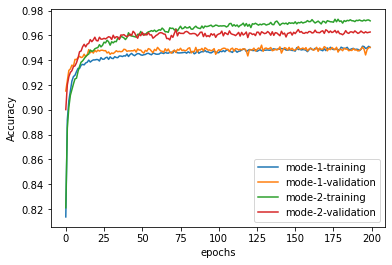

In [31]:
import matplotlib.pyplot as plt

# 顯示兩個模型的歷史精準度
plt.plot(history_1.history["binary_accuracy"], label="mode-1-training")
plt.plot(history_1.history["val_binary_accuracy"], label="mode-1-validation")
plt.plot(history_2.history["binary_accuracy"], label="mode-2-training")
plt.plot(history_2.history["val_binary_accuracy"], label="mode-2-validation")
plt.ylabel("Accuracy")
plt.xlabel("epochs")
plt.legend()

In [32]:
# 驗證在測試資料上

# 載入準確率最高的權重
model_1.load_weights(model_dir + "/Best-Model-1.h5")
model_2.load_weights(model_dir + "/Best-Model-2.h5")
loss_1, acuracy1 = model_1.evaluate(x_test_normal, y_test)
loss_2, acuracy2 = model_2.evaluate(x_test_one_hot, y_test)
print(f"model-1: {acuracy1}\n" f"model-2: {acuracy2}")

10000/10000 [==============================] - 0s 42us/sample - loss: 0.0945 - binary_accuracy: 0.9645
model-1: 0.951200008392334
model-2: 0.9645000100135803


### PK 預測

In [33]:
# 讀取個別資料
venusaur = np.expand_dims(pokemon_data_one_hot[3], axis=0)  # 妙蛙花
charizard = np.expand_dims(pokemon_data_one_hot[7], axis=0)  # 噴火龍
blastoise = np.expand_dims(pokemon_data_one_hot[12], axis=0)  # 水箭龜

In [34]:
# 三者的 PK 預測

# 妙蛙花 vs 噴火龍
pred = model_2.predict(np.concatenate([venusaur, charizard], axis=-1))
winner = "妙蛙花" if pred < 0.5 else "噴火龍"
print(f"pred={pred}, {winner} 獲勝")

# 噴火龍 vs 水箭龜
pred = model_2.predict(np.concatenate([charizard, blastoise], axis=-1))
winner = "噴火龍" if pred < 0.5 else "水箭龜"
print(f"pred={pred}, {winner} 獲勝")

# 水箭龜 vs 妙蛙花
pred = model_2.predict(np.concatenate([blastoise, venusaur], axis=-1))
winner = "水箭龜" if pred < 0.5 else "妙蛙花"
print(f"pred={pred}, {winner} 獲勝")

pred=[[0.99993896]], 噴火龍 獲勝
pred=[[2.2984727e-07]], 噴火龍 獲勝
pred=[[0.99991655]], 妙蛙花 獲勝
